In [3]:
from sklearn.datasets import fetch_openml
import matplotlib as mpl
import matplotlib.pyplot as plt

In [4]:
mnist = fetch_openml('mnist_784', version=1)

In [4]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [5]:
x, y = mnist["data"], mnist["target"]
print(x.shape)
print(y.shape)

(70000, 784)
(70000,)


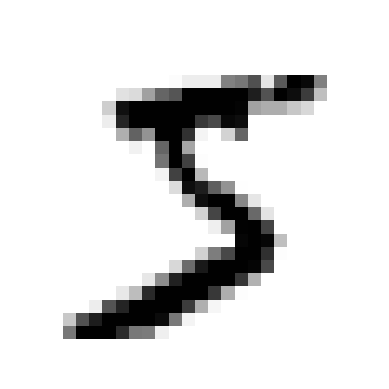

In [6]:
x_array = x.to_numpy()
some_digit = x_array[0]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap="binary")
plt.axis("off")
plt.show()

In [7]:
x_train, x_test, y_train, y_test = x[:60000], x[60000:], y[:60000], y[60000:]

In [8]:
y_train = y_train.astype(int)
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)


In [10]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(x_train, y_train_5)

SGDClassifier(random_state=42)

In [10]:
sgd_clf.predict([some_digit])

g:\Programming exercise\python exercise\machine learning ex\ml_env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([ True])

In [11]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, x_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

In [12]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, x_train, y_train_5, cv=3)

In [13]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]])

In [14]:
y_train_perfect_predictions = y_train_5 # pretend we reached perfection
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]])

In [15]:
from sklearn.metrics import precision_score, recall_score
precistion = precision_score(y_train_5, y_train_pred)
recall = recall_score(y_train_5, y_train_pred)
print(precistion)
print(recall)

0.8370879772350012
0.6511713705958311


In [16]:
from sklearn.metrics import f1_score
f1 = f1_score(y_train_5, y_train_pred)
print(f1)

0.7325171197343847


In [11]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

g:\Programming exercise\python exercise\machine learning ex\ml_env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([2164.22030239])

In [13]:
from sklearn.model_selection import cross_val_predict
y_scores = cross_val_predict(sgd_clf, x_train, y_train_5, cv=3,method="decision_function")
y_scores

array([  1200.93051237, -26883.79202424, -33072.03475406, ...,
        13272.12718981,  -7258.47203373, -16877.50840447])

In [19]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

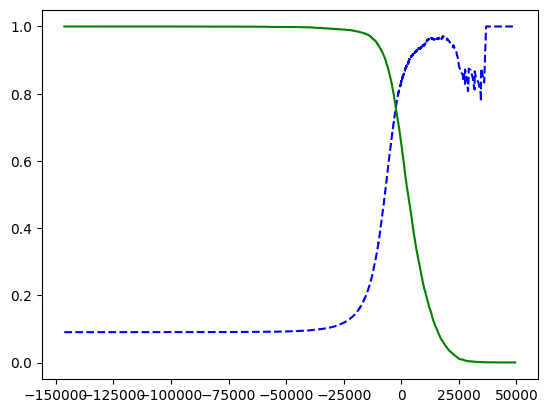

In [20]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
 plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
 plt.plot(thresholds, recalls[:-1], "g-", label="Recall")

plot_precision_recall_vs_threshold(precisions=precisions, recalls=recalls, thresholds=thresholds)
plt.show()

In [21]:
import numpy as np
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]
threshold_90_precision

np.float64(3370.0194991439557)

In [22]:
y_train_pred_90 = (y_scores >= threshold_90_precision)

In [23]:
recall_score(y_train_5, y_train_pred_90)

np.float64(0.4799852425751706)

In [14]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

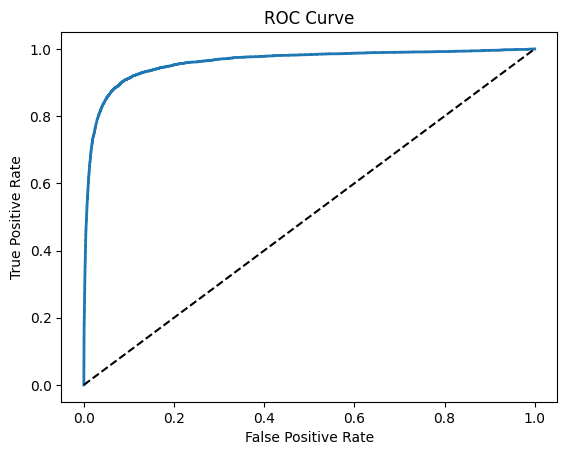

true positive rate formula : TPR = FP / (TP + FN)
false positive rate formula : FPR = FP / (FP + TN)


In [24]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.title("ROC Curve")
    plt.ylabel("True Positive Rate")
    plt.xlabel("False Positive Rate")
    plt.plot([0, 1], [0, 1], 'k--')

plot_roc_curve(fpr=fpr, tpr=tpr)
plt.show()

print('true positive rate formula : TPR = FP / (TP + FN)')
print('false positive rate formula : FPR = FP / (FP + TN)')


In [25]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

np.float64(0.9604938554008616)

<div dir="rtl" style="font-family: 'Sahel Regular', sans-serif;">

منحنی ROC (Receiver Operating Characteristic) و منحنی PR (Precision-Recall) هر دو ابزارهای مهمی برای ارزیابی عملکرد مدل‌های طبقه‌بندی هستند، اما تفاوت‌های کلیدی بین آن‌ها وجود دارد:

1. **منحنی ROC**:
   - **محورهای نمودار**: نرخ مثبت واقعی (True Positive Rate یا TPR) در برابر نرخ مثبت کاذب (False Positive Rate یا FPR).
   - **کاربرد**: مناسب برای داده‌های متوازن که تعداد نمونه‌های مثبت و منفی تقریباً برابر است.
   - **مزیت**: به خوبی نشان می‌دهد که مدل چقدر می‌تواند بین کلاس‌های مختلف تمایز قائل شود.

2. **منحنی PR**:
   - **محورهای نمودار**: دقت (Precision) در برابر بازیابی (Recall).
   - **کاربرد**: مناسب برای داده‌های نامتوازن که تعداد نمونه‌های مثبت و منفی به طور قابل توجهی متفاوت است.
   - **مزیت**: در شرایطی که کلاس مثبت نادر است، عملکرد مدل را بهتر نشان می‌دهد.

</div>



<div dir="rtl" style="font-family: 'Sahel Regular', sans-serif;">

### معیارهای انتخاب بین منحنی ROC و منحنی PR

1. **تعادل داده‌ها**:
   - **منحنی ROC**: مناسب برای داده‌های متوازن.
   - **منحنی PR**: مناسب برای داده‌های نامتوازن.

2. **تفسیر آسان**:
   - **منحنی ROC**: تفسیر ساده‌تری دارد و به راحتی می‌توان عملکرد مدل را با آن ارزیابی کرد.
   - **منحنی PR**: در شرایطی که کلاس مثبت نادر است، تفسیر دقیق‌تری از عملکرد مدل ارائه می‌دهد.

3. **حساسیت به تغییرات در داده‌ها**:
   - **منحنی ROC**: نسبت به تغییرات در توزیع داده‌ها حساسیت کمتری دارد.
   - **منحنی PR**: حساسیت بیشتری به تغییرات در توزیع داده‌ها دارد و می‌تواند عملکرد مدل را در شرایط مختلف بهتر نشان دهد.

4. **معیارهای عملکرد**:
   - **منحنی ROC**: نرخ مثبت واقعی (TPR) و نرخ مثبت کاذب (FPR) را ارزیابی می‌کند.
   - **منحنی PR**: دقت (Precision) و بازیابی (Recall) را ارزیابی می‌کند.

5. **کاربردهای خاص**:
   - **منحنی ROC**: برای ارزیابی کلی عملکرد مدل و مقایسه مدل‌ها مناسب است.
   - **منحنی PR**: برای ارزیابی عملکرد مدل در شرایطی که کلاس مثبت نادر است، مناسب‌تر است.

</div>
